In [2]:
import pandas as pd
import matplotlib as plt

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#read data set into dataframe df
df = pd.read_csv("2019-XTern.csv")

#print top five rows just to check if the column names are correct and length of df
print(df.head(5))
print("Length of data frame: ",len(df))

   scooter_id  xcoordinate  ycoordinate  power_level
0           0     0.906835     0.776484            0
1           1     0.928587     0.804964            2
2           2     0.904091     0.784043            1
3           3     0.906752     0.804461            0
4           4     0.900641     0.781683            4
Length of data frame:  25668


,power_level,count
0,0,4388
1,1,4248
2,2,4245
3,3,4160
4,4,4284
5,5,4343


0.49156734566600463
0.43708335407137494


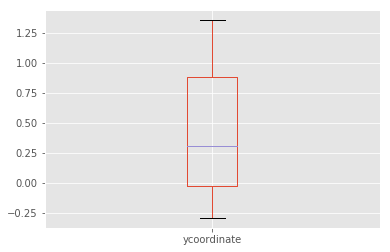

In [16]:
#in this graph the line inside the box shows the median
#the mean of xcoordinate ad ycoordinate gives a point(0.49,0.43) 
#which shows that median and mean are fairly close and we can say that scooters are evenly distributed
#Most time is taken for the bus to reach the scooters that are lying in the outliers region.
print(df['xcoordinate'].mean())
print(df['ycoordinate'].mean())
df.plot(x='xcoordinate',y='ycoordinate',kind='box')

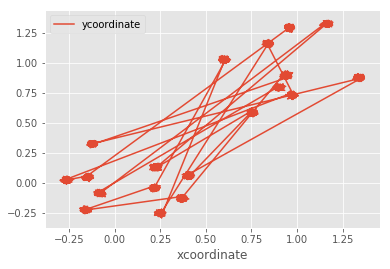

In [6]:
#this graph shows that the most popular scooter locations are in the top right corner and bottom left corner of this graph
#

df.plot(x='xcoordinate',y='ycoordinate',kind='line')

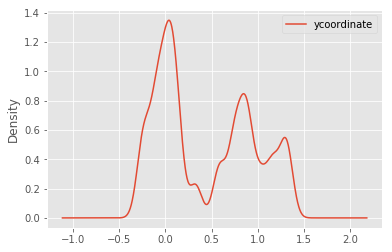

In [8]:
df.plot(x='xcoordinate',y='ycoordinate',kind='density')

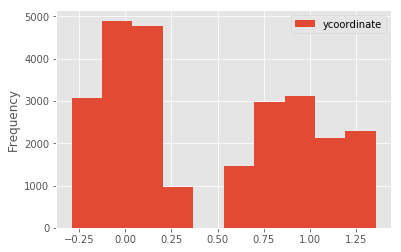

In [9]:
df.plot(x='xcoordinate',y='ycoordinate',kind='hist')

In [16]:
def time_cost():
    time = 0
    for i in range(0,len(df)):
        if df.iloc[i]['power_level'] == 0:
            time = time + 5
        elif df.iloc[i]['power_level'] == 1:
            time = time + 4
        elif df.iloc[i]['power_level'] == 2:
            time = time + 3
        elif df.iloc[i]['power_level'] == 3:
            time = time + 2
        elif df.iloc[i]['power_level'] == 4:
            time = time + 1
        elif df.iloc[i]['power_level'] == 5:
            time = time + 0
    return time

print("Operation Time Cost:" ,time_cost(), " hours")
"""
We can sacrifice some capital to decrease total time taken to charge the buses. I am saying that sacrifice capital because
we can add another bus. This way we can have two buses at most popular locations.
Our time will reduce in half. Therefore we are sacrificing cost for time.
"""
        

Operation Time Cost: 64271  hours


In [ ]:
#For following three blocks I am checking the total distance that bus has to cover by changing its coordinates
#I am doing this because from my above line graph I thought if bus can be located in the middle of the graph
#In the distance_bus_neg bus starts at (-20.19,-20.19) and goes up by 5 digitd in every iteration
#In the distance_bus_pos bus starts at (20.19,2019) and goes down by 5 digits in every iteration
#I figured out that the given (20.19,20.19) coordinates are optimal for now

In [16]:
def distance_bus_neg():
    x_bus = -20.19
    y_bus = -20.19
    total_dist = 0
    while x_bus < 0 and y_bus < 0:
        for i in range(0,len(df)):
            total_dist = total_dist + ((x_bus-df.iloc[i]['xcoordinate'])**2+(y_bus-df.iloc[i]['ycoordinate'])**2)**1/2
        print(x_bus,y_bus,round(total_dist,2))
        x_bus = round((x_bus + 5),2)
        y_bus = round((y_bus + 5),2)
        
    return round(total_dist,2)
print(distance_bus())

-20.19 -20.19 10956320.58
-15.19 -15.19 17252788.93
-10.19 -10.19 20172805.05
-5.19 -5.19 20999768.94
-0.19 -0.19 21017080.59
21017080.59


In [ ]:
def distance_bus_pos():
    x_bus = 20.19
    y_bus = 20.19
    total_dist = 0
    while x_bus > 0 and y_bus > 0:
        for i in range(0,len(df)):
            total_dist = total_dist + ((x_bus-df.iloc[i]['xcoordinate'])**2+(y_bus-df.iloc[i]['ycoordinate'])**2)**1/2
        print(x_bus,y_bus,round(total_dist,2))
        x_bus = round((x_bus - 5),2)
        y_bus = round((y_bus - 5),2)
        
    return round(total_dist,2)
print(distance_bus())

In [20]:
bus_distances1 = [9993798.42,15566110.67,18000336.76, 18579876.67,18588130.42]
bus_distances2 = [10956320.58, 17252788.93, 20172805.05, 20999768.94, 21017080.59]
print("Minimum distance for Positive coordinates of bus: ", min(bus_distances1))
print("Minimus distance for Negative coordinates of bus: ", min(bus_distances2))
min(9993798.42, 10956320.58)

Positive coordinates of bus:  9993798.42
Negative coordinates of bus:  10956320.58


9993798.42

In [17]:
#just to see any trends or similarities in data group by power level
# it tells how many scooters at a certain power level
df.groupby(['power_level']).size().reset_index().rename(columns={0:'count'})

,power_level,count
0,0,4388
1,1,4248
2,2,4245
3,3,4160
4,4,4284
5,5,4343


In [19]:
if_two_buses = round(64271/2)
print("If two buses are charging: ", if_two_buses)

If two buses are charging:  32136


In [18]:
"""
Most Significant Scooter charging strategy:
After running above two functions I figured that bus start and end point is already at an optimal location.
However we can do following things to optimize our charging strategy:
    1. From above table we know that there is almost an equal number of scooters at all power levels.
    2. We can divide and conquer by adding another bus for charging. This will considerably reduce the time it takes to charge.
    3. With one bus for charging it takes 64271 hours to charge all scooters. If there are two buses it will take 32136 hours.
                                            OR
    4. We can signal the bus hourly to travel to scooters whose power level is at 0.
    5. We can add scooter charging stations at popular locations and ask people to plug it in if possible when their ride ends.
       This way we won't need any bus. Or we can have a bus just to charge those scooters which were not plugged in.
       Or we can keep an eye on power levels of scooters and if there are scooters that are not plugged in then we can have someone to plug the scooters at charging stations if needed.
    

"""


'\nAfter running above two functions I figured that bus start and end point is already at an optimal location.\nHowever we can do following things to optimize or charging strategy:\n    1. From above table we know that there is almost an equal number of scooters at all power levels.\n    2. We can divide and conquer by adding another bus for charging. This will considerably reduce the time it takes to charge.\n    3. With one bus for charging it takes 64271 hours to charge all scooters. If there are two buses it will take \n\n'